#**Heart Failure Prediction using Logistic Regression**

###**Name: Gupta Bhandari**
###**Student id: c0899873**

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv") # loading dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##**Descriptive Analysis**

In [ ]:
df.columns.tolist() # this prints all the column names as a list

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.shape

(299, 13)

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# checking for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##**Visualization**

<Axes: >

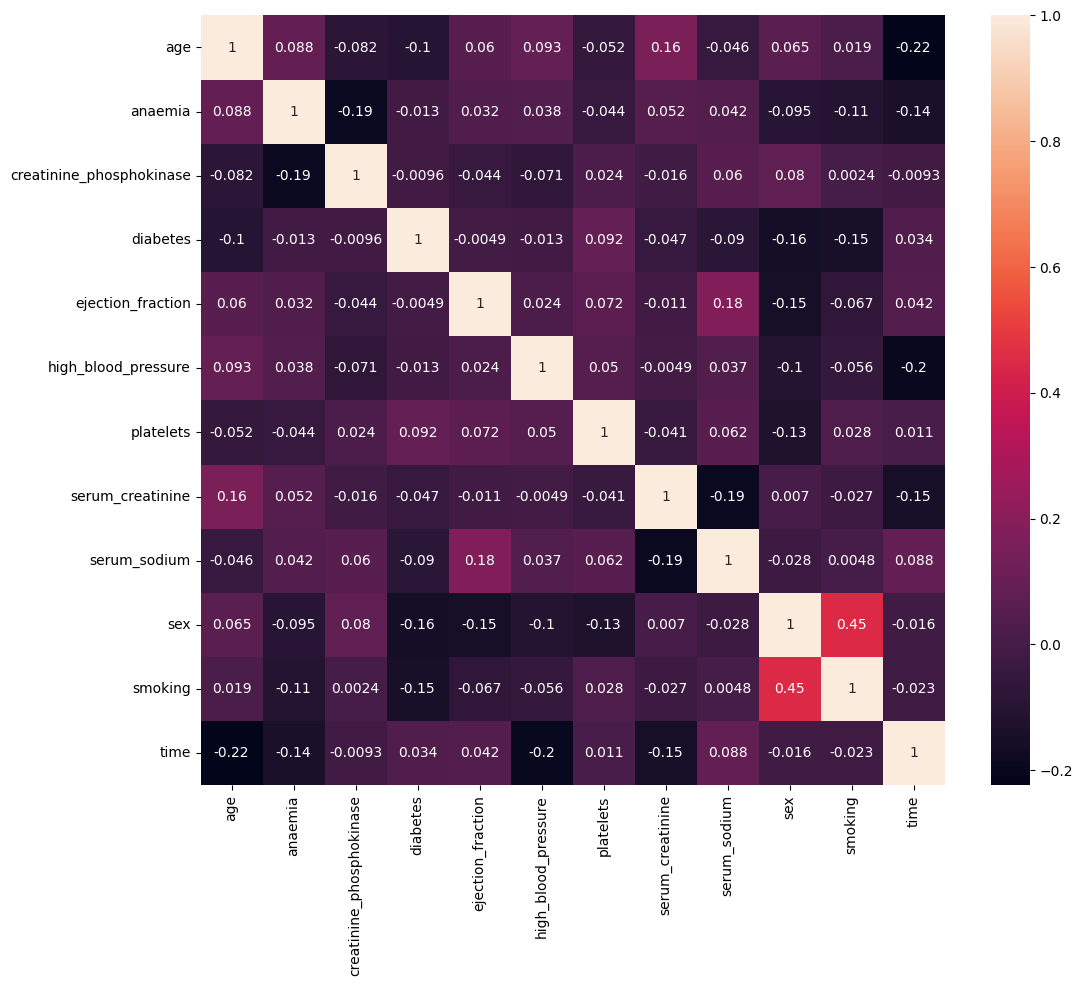

In [ ]:
#1. Heatmap - correlations
df_heatmap = X=df.drop(['DEATH_EVENT'],axis=1)
plt.figure(figsize = (12, 10))
sns.heatmap(df_heatmap.corr(), annot=True) #it creates heatmap for correlations

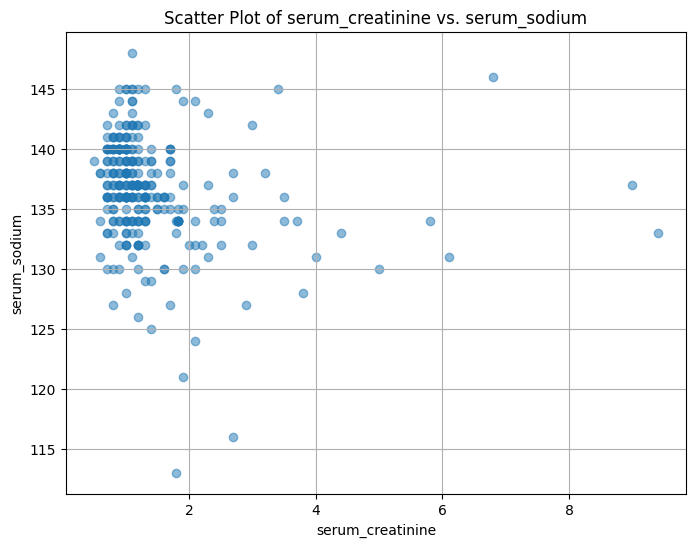

In [ ]:
#Scatter Plot of serum_creatinine vs. serum_sodium:
plt.figure(figsize=(8, 6))
plt.scatter(df['serum_creatinine'], df['serum_sodium'], alpha=0.5)
plt.xlabel('serum_creatinine')
plt.ylabel('serum_sodium')
plt.title('Scatter Plot of serum_creatinine vs. serum_sodium')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Number of people with high blood pressure based on sex')

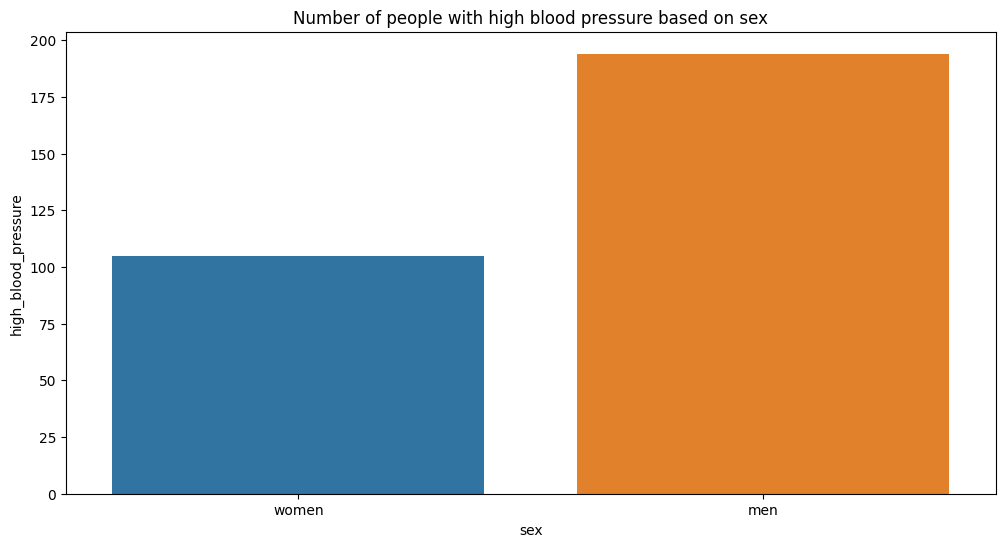

In [ ]:
#bar graph representing the number of people with high blood pressure based on sex
bar = df.sort_values(by='high_blood_pressure',ascending=False)[['sex','high_blood_pressure']]
bar = bar.groupby('sex')['high_blood_pressure'].count().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='sex',y='high_blood_pressure',data=bar)
plt.xticks([0, 1], ['women', 'men'])
plt.title('Number of people with high blood pressure based on sex')

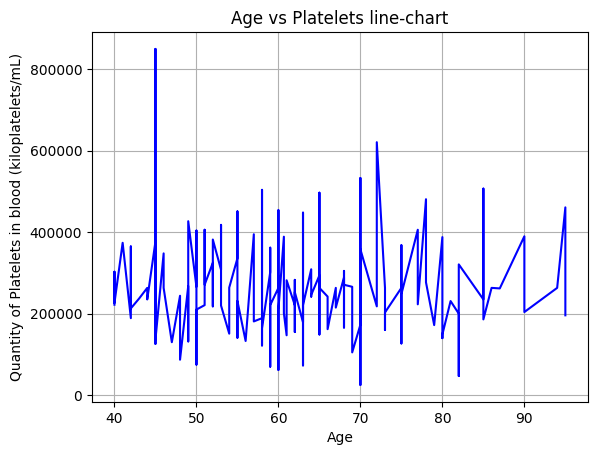

In [ ]:
# Plotting a line plot between age and quantity of platelets

line = df.sort_values(by='age',ascending=True)[['age','platelets']]
plt.plot(line['age'], line['platelets'], linestyle='-', color='b')

plt.xlabel('Age')
plt.ylabel('Quantity of Platelets in blood (kiloplatelets/mL)')
plt.title('Age vs Platelets line-chart')

plt.grid()
plt.show()

##**Model building and Training**

In [ ]:
# Splitting dataset into dependent and independent variables
X = df.drop(['DEATH_EVENT'],axis=1) # independent variables
y = df['DEATH_EVENT'] # dependent variables

In [ ]:
#importing important libraries for model training
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# scaling independent variables using standard scaler
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [ ]:
#Splitting dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state = 42)

In [ ]:
# model building and training using Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [ ]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[34,  1],
       [11, 14]])

In [ ]:
#Accuracy score
accuracy_score(y_test, y_pred)

0.8

In [ ]:
# Recall score
recall_score(y_test, y_pred)

0.56

In [ ]:
# Precision score
precision_score(y_test, y_pred)

0.9333333333333333

In [ ]:
# F1-Score
f1_score(y_test, y_pred)

0.7000000000000001

##**Creating a pickle file**

In [ ]:
import pickle
pickle.dump(lg, open("logistic_regresion.pkl", "wb"))